In [27]:
import numpy as np # linear algebra
import pandas as pd # dataframes
import matplotlib.pyplot as plt # General visualisations
import matplotlib.ticker as mtick # Axis visuals
import seaborn as sns # Statistical visualisations
sns.set(rc={'figure.figsize':(15,10)})
from math import pi # Radar chart support
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, FunctionTransformer, LabelEncoder, RobustScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, classification_report 

from sklearn import svm

plt.style.use('ggplot')


In [5]:
from sklearn.model_selection import StratifiedKFold, KFold
def cross_validation(X,y,model):
    f1 = []
    conv = []
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        f1_macro = f1_score(y_test, y_pred, average = 'macro')
       
        f1.append(f1_macro)
        #conv.append(confusion_matrix(y_test, y_pred))
        print(f'here is the : {f1_macro}')
        print(classification_report(y_test, y_pred))
        print("==="*20)
    return f1, conv

In [4]:
train = pd.read_csv('../data/preprocess/train_2.csv')
train = train.iloc[:,2:]

/var/folders/yt/n9_2kr5s6nx_5b2y_kx3mnnm0000gn/T/ipykernel_19021/592460438.py:1: DtypeWarning: Columns (6,7,8,9,10,11,12,13,14,17,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('../data/preprocess/train_2.csv')


In [6]:
### fun
# Calculate counts
def analyze(data,cols_a,cols_b):
    df_temp = data.groupby([cols_a,cols_b]).size().reset_index(name='count')

    # Set Index
    df_temp = df_temp.set_index([cols_a, cols_b])

    # Calculate Proportion of grade
    df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()

    # Plot chart
    plt.figure(figsize=(12,5))
    ax = sns.barplot(data = df_temp, 
                    x = cols_a, 
                    y = 'count', 
                    hue = cols_b)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
    plt.title("Distribution ")
    plt.xlabel(f"{cols_a}")
    plt.ylabel(f"{cols_b}")
    plt.show()

    # Clean up
    del df_temp, ax

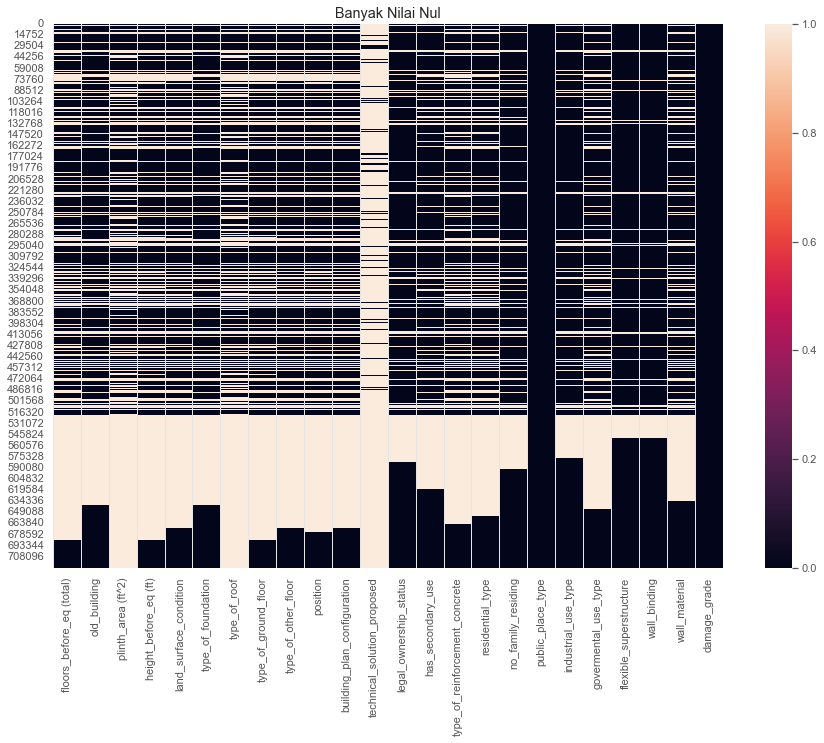

In [28]:
plt.title("Banyak Nilai Nul")
sns.heatmap(train.isna())

In [7]:
train_data_new = train.dropna(thresh=23)
train_data_new.isna().sum()

floors_before_eq (total)               0
old_building                           0
plinth_area (ft^2)                     0
height_before_eq (ft)                  0
land_surface_condition                 0
type_of_foundation                     0
type_of_roof                           0
type_of_ground_floor                   0
type_of_other_floor                    0
position                               0
building_plan_configuration            0
technical_solution_proposed       254806
legal_ownership_status                 0
has_secondary_use                      0
type_of_reinforcement_concrete         0
residential_type                       0
no_family_residing                     0
public_place_type                      0
industrial_use_type                    0
govermental_use_type                   0
flexible_superstructure                0
wall_binding                           0
wall_material                          0
damage_grade                           0
dtype: int64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribusi Variable Target')

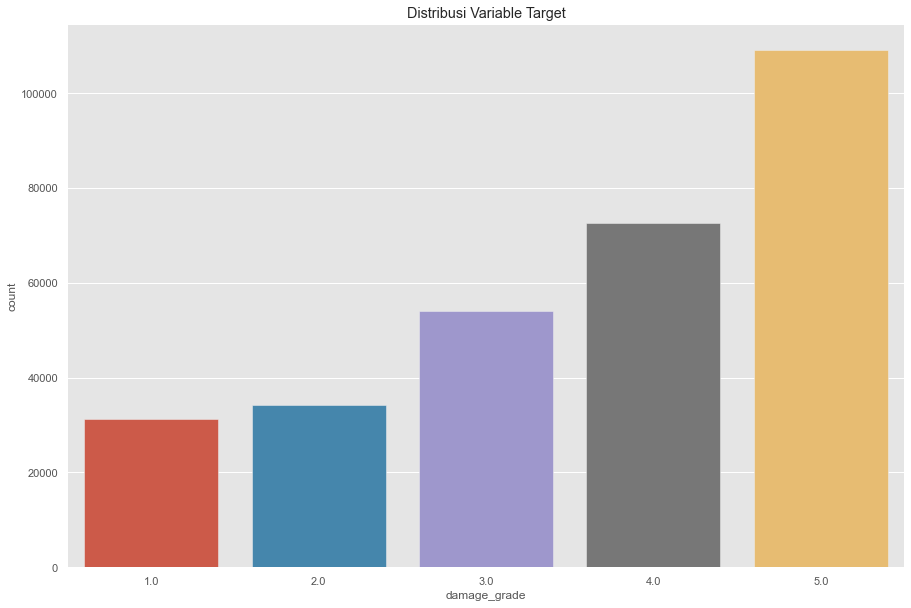

In [29]:

#plt.figure(figsize=(10,10))
chart = sns.countplot(train_data_new.damage_grade)
chart.set_title('Distribusi Variable Target')

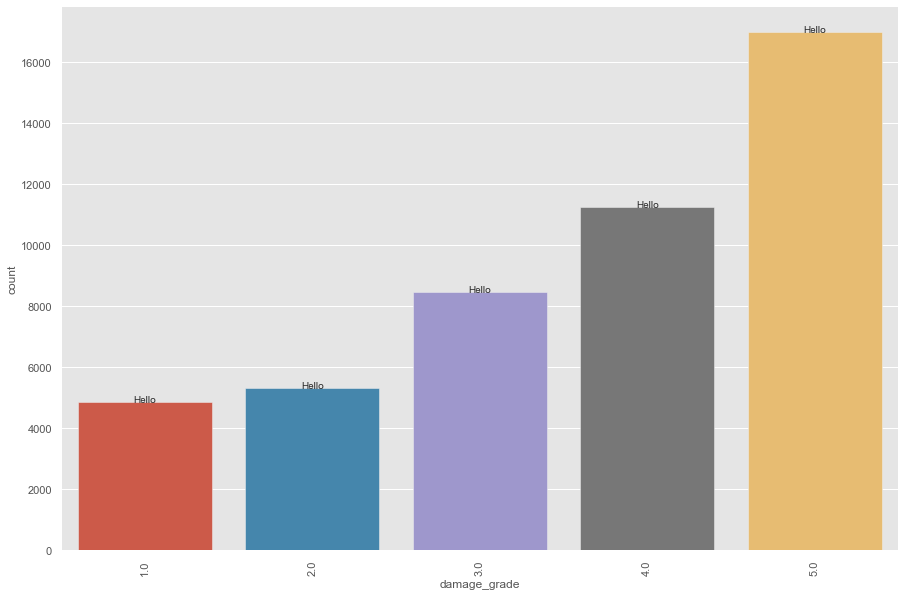

In [70]:
fig, ax1 = plt.subplots(figsize=(15,10))
graph = sns.countplot(ax=ax1,x='damage_grade', data=train_data_new)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
        'Hello',ha="center")

/var/folders/yt/n9_2kr5s6nx_5b2y_kx3mnnm0000gn/T/ipykernel_47626/1307814918.py:10: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()


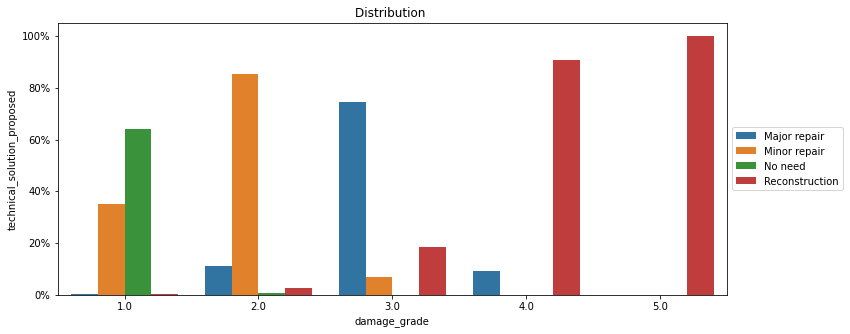

In [14]:
analyze(train_data_new,'damage_grade','technical_solution_proposed')

/var/folders/yt/n9_2kr5s6nx_5b2y_kx3mnnm0000gn/T/ipykernel_47626/1307814918.py:10: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()


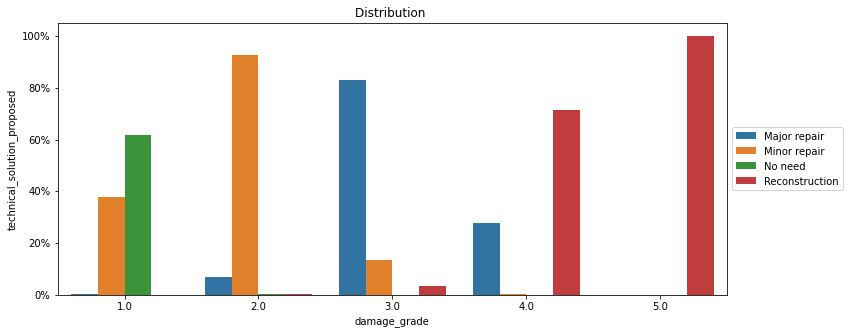

In [19]:
analyze(train_data_new[train_data_new.wall_binding==2],'damage_grade','technical_solution_proposed')

In [31]:
train_data_new = train.dropna(subset = ['technical_solution_proposed'])
train_data_new.isna().sum()

floors_before_eq (total)          0
old_building                      0
plinth_area (ft^2)                0
height_before_eq (ft)             0
land_surface_condition            0
type_of_foundation                0
type_of_roof                      0
type_of_ground_floor              0
type_of_other_floor               0
position                          0
building_plan_configuration       0
technical_solution_proposed       0
legal_ownership_status            0
has_secondary_use                 0
type_of_reinforcement_concrete    0
residential_type                  0
no_family_residing                0
public_place_type                 0
industrial_use_type               0
govermental_use_type              0
flexible_superstructure           0
wall_binding                      0
wall_material                     0
damage_grade                      0
dtype: int64

In [32]:
obj_cols = train_data_new.select_dtypes(include='object').columns.tolist()
num_cols = [i for i in train.columns[:-1] if i not in obj_cols]
tmp_train = train_data_new.copy()

In [33]:
### binding 
for i in num_cols[:5]:
    for c in num_cols:
        tmp_train[f'{c}_nominal'] = pd.cut(tmp_train[c], bins=5, labels=[1,2,3,4,5])

In [34]:
### onehot
tmp_var_ohe = pd.get_dummies(tmp_train[obj_cols])
tmp_var_ohe

,land_surface_condition_Flat,land_surface_condition_Moderate slope,land_surface_condition_Steep slope,type_of_foundation_bamboo/timber,type_of_foundation_cement-stone/brick,type_of_foundation_clay mortar-stone/brick,type_of_foundation_mud mortar-stone/brick,type_of_foundation_other,type_of_foundation_rc,type_of_roof_bamboo/timber heavy roof,...,industrial_use_type_Infrastructure,industrial_use_type_Manufacturing,industrial_use_type_Metallurgy,industrial_use_type_Non-industrial,industrial_use_type_Service/Tourism,govermental_use_type_Govermental Buildings,govermental_use_type_Non-govermental,govermental_use_type_Police Offices,flexible_superstructure_available,flexible_superstructure_unavailable
21,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
27,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
43,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
46,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
92,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519918,1,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
519956,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
519969,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
519980,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [35]:
for i in obj_cols[2:5]:
    tmp_train.groupby(['technical_solution_proposed', i])[i].count()

In [36]:
def freq_encoding(data, cat_feat):
  grouped_data = data.groupby([cat_feat]).size()/data.shape[0]
  data.loc[:, f'{cat_feat}_encode'] = data[cat_feat].map(grouped_data)
  return data

In [38]:
for col in ['land_surface_condition',
 'type_of_foundation',
 'type_of_roof',
 'type_of_ground_floor',
 'type_of_other_floor',
 'position',
 'building_plan_configuration']:
  tmp_train = freq_encoding(tmp_train, col)

t

In [39]:
cols_tmp = [i for i in tmp_train if i not in obj_cols and i != 'damage_grade']

In [40]:
train_final = pd.concat([tmp_var_ohe,tmp_train[cols_tmp]],axis=1)

In [46]:
train = pd.concat([train_final,tmp_train['damage_grade']],axis=1)

In [56]:
cols_top_20 = train.corr().abs().loc['damage_grade'].sort_values(ascending=False)[1:21].index
val_top_20 = train.corr().abs().loc['damage_grade'].sort_values(ascending=False)[1:21].values
cols_top_20,val_top_20

/var/folders/yt/n9_2kr5s6nx_5b2y_kx3mnnm0000gn/T/ipykernel_19021/2212724620.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cols_top_20 = train.corr().abs().loc['damage_grade'].sort_values(ascending=False)[1:21].index
/var/folders/yt/n9_2kr5s6nx_5b2y_kx3mnnm0000gn/T/ipykernel_19021/2212724620.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  val_top_20 = train.corr().abs().loc['damage_grade'].sort_values(ascending=False)[1:21].values


(Index(['technical_solution_proposed_Reconstruction',
        'technical_solution_proposed_Minor repair',
        'technical_solution_proposed_No need', 'wall_binding', 'wall_material',
        'type_of_ground_floor_rc', 'type_of_foundation_encode',
        'type_of_roof_rb/rcc/rbc', 'type_of_foundation_clay mortar-stone/brick',
        'type_of_foundation_rc', 'type_of_reinforcement_concrete',
        'type_of_other_floor_rb/rcc/rbc', 'type_of_foundation_bamboo/timber',
        'type_of_other_floor_timber/bamboo-mud',
        'type_of_other_floor_not applicable', 'type_of_ground_floor_encode',
        'type_of_other_floor_encode', 'type_of_ground_floor_clay',
        'technical_solution_proposed_Major repair', 'floors_before_eq (total)'],
       dtype='object'),
 array([0.82924833, 0.55525021, 0.52598548, 0.44962435, 0.44507498,
        0.4117543 , 0.35986229, 0.35949715, 0.3538302 , 0.31975845,
        0.29945575, 0.28812297, 0.2444907 , 0.21753343, 0.21067971,
        0.20740974, 0.

In [64]:
data_corr = pd.DataFrame(val_top_20,columns=cols_top_20)
data_corr

ValueError: Shape of passed values is (20, 1), indices imply (20, 20)

Index(['technical_solution_proposed_Reconstruction',
       'technical_solution_proposed_Minor repair',
       'technical_solution_proposed_No need', 'wall_binding', 'wall_material',
       'type_of_ground_floor_rc', 'type_of_foundation_encode',
       'type_of_roof_rb/rcc/rbc', 'type_of_foundation_clay mortar-stone/brick',
       'type_of_foundation_rc', 'type_of_reinforcement_concrete',
       'type_of_other_floor_rb/rcc/rbc', 'type_of_foundation_bamboo/timber',
       'type_of_other_floor_timber/bamboo-mud',
       'type_of_other_floor_not applicable', 'type_of_ground_floor_encode',
       'type_of_other_floor_encode', 'type_of_ground_floor_clay',
       'technical_solution_proposed_Major repair', 'floors_before_eq (total)'],
      dtype='object')

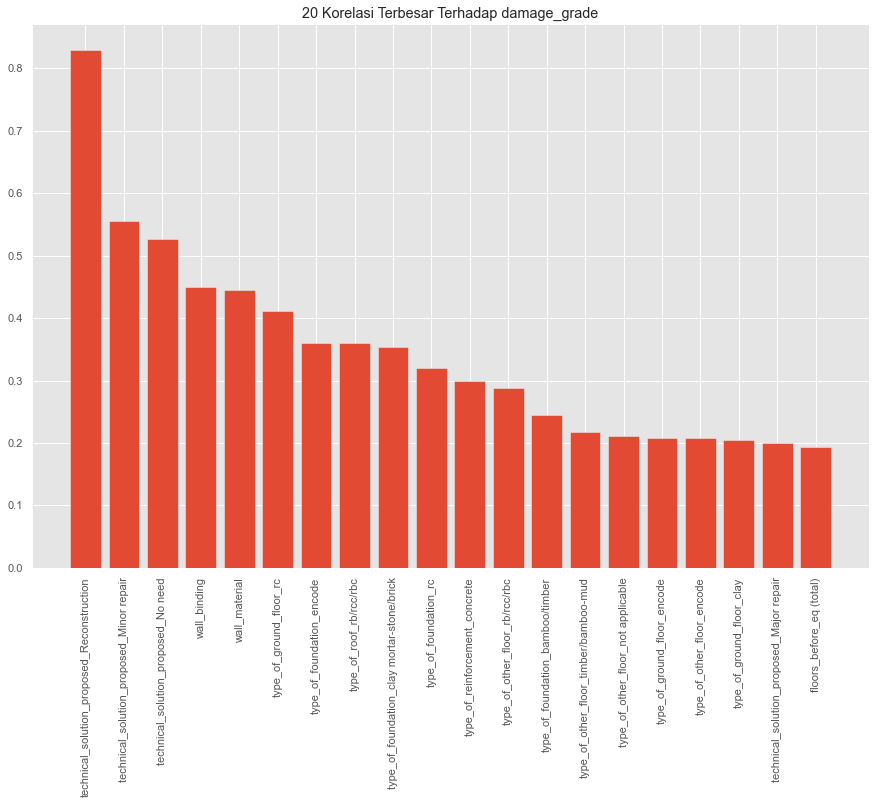

In [69]:
plt.bar(cols_top_20,val_top_20)
plt.xticks(rotation = 90)
plt.title('20 Korelasi Terbesar Terhadap damage_grade')

cols_top_20